#### Predicting Estate Value :

1. DESCRIPTION OF THE DATA:

A. Contains details of properties of Gurgaon, Hyderabad, Mumbai, Kolkata cities of India.

B. All datasets of different cities contains almost 10K properties.

C. Target column: PRICE

2. Data Usage :
This dataset can be used for various real estate-related tasks, including:
A. Property price prediction.

B. Market analysis to identify trends and patterns.

C. Identifying popular property types and locations.

D. Evaluating the impact of property attributes on price.

# Importing Table & Librarys :

In [1]:
## For Data Manupulation:
import pandas as pd

## For Scientific Calculation :
import numpy as np

## For Data Visualization :
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## For Data Warning :
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv(r"C:\Users\DELL\Downloads\CP2\gurgaon_10k.csv")
df2 = pd.read_csv(r"C:\Users\DELL\Downloads\CP2\hyderabad.csv")
df3 = pd.read_csv(r"C:\Users\DELL\Downloads\CP2\kolkata.csv")
df4 = pd.read_csv(r"C:\Users\DELL\Downloads\CP2\mumbai.csv")

df = pd.concat([df1,df2,df3,df4],axis=0,ignore_index=True)
df.sample(5)

,PROP_ID,PHOTO_URL,MEDIUM_PHOTO_URL,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,LOCALITY,TRANSACT_TYPE,OWNTYPE,...,ALT_TAG,PRODUCT_TYPE,PROPERTY_TYPE__U,SECONDARY_AREA,VALUE_LABEL,REGISTER_DATE__U,REGISTERED_DAYS,PRIMARY_TAGS,SUPER_AREA,SUPERAREA_UNIT
19003,K70262382,NaN,NaN,R,"Dear client,\n\nThank you for viewing our list...",Residential Apartment,Hyderabad,NaN,NaN,0,...,S and S Green Grace Hall,PREMIUM_LISTING,1.0,260.13 sq.m.,NaN,2023-07-15 23:57:43,1 month ago,[],NaN,NaN
30512,Z68214580,NaN,NaN,P,Looking for a charming 2 bhk fully_furnished g...,Residential Apartment,Mumbai Andheri-Dahisar,NaN,NaN,0,...,Beau Monde CHS Hall,PREMIUM_LISTING,1.0,65.03 sq.m.,NaN,2023-07-10 00:00:00,1 month ago,[],NaN,NaN
28230,F67515698,NaN,NaN,S,Located in the popular residential address of ...,Residential Apartment,Kolkata East,NaN,1.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19492,N70995846,NaN,NaN,S,Triplex villas for sale\nSwimming pool\nGym fa...,Independent House/Villa,Hyderabad,NaN,1.0,1,...,"₹1.5 Crore, 6 bhk House/Villa in Dundigal - House",PLATINUM_LISTING,2.0,167.23 sq.m.,Freehold,2023-08-24 17:10:33,2 days ago,[],NaN,NaN
35530,S70158022,NaN,NaN,S,Birla Niyaara offers 3 BHK apartments in Worli...,Residential Apartment,South Mumbai,NaN,2.0,1,...,Birla Niyaara Others,PSEUDO_LISTING,1.0,106.84 sq.m.,Freehold,2023-07-10 15:42:24,1 month ago,[],NaN,NaN


# Data preliminary information:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38502 entries, 0 to 38501
Data columns (total 85 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROP_ID                       38502 non-null  object 
 1   PHOTO_URL                     8864 non-null   object 
 2   MEDIUM_PHOTO_URL              8864 non-null   object 
 3   PREFERENCE                    38502 non-null  object 
 4   DESCRIPTION                   38502 non-null  object 
 5   PROPERTY_TYPE                 38502 non-null  object 
 6   CITY                          38502 non-null  object 
 7   LOCALITY                      10704 non-null  object 
 8   TRANSACT_TYPE                 31988 non-null  float64
 9   OWNTYPE                       38502 non-null  int64  
 10  BEDROOM_NUM                   34948 non-null  float64
 11  BATHROOM_NUM                  10704 non-null  float64
 12  BALCONY_NUM                   28505 non-null  float64
 13  P

In [4]:
data = pd.DataFrame(df.isna().sum())
data

,0
PROP_ID,0
PHOTO_URL,29638
MEDIUM_PHOTO_URL,29638
PREFERENCE,0
DESCRIPTION,0
...,...
REGISTER_DATE__U,19501
REGISTERED_DAYS,19501
PRIMARY_TAGS,19501
SUPER_AREA,37682


In [5]:
df = df.drop(['SUPERAREA_UNIT','SUPER_AREA','PRIMARY_TAGS','REGISTERED_DAYS','REGISTER_DATE__U',
              'VALUE_LABEL','SECONDARY_AREA','PROPERTY_TYPE__U','PRODUCT_TYPE','ALT_TAG','VERIFIED','PROJ_ID',
              'PROPERTY_NUMBER','RES_COM','CLASS','UPDATE_DATE','POSTING_DATE','SPID','FURNISHING_ATTRIBUTES',
              'QUALITY_SCORE','COMMON_FURNISHING_ATTRIBUTES','SUPER_SQFT','BUILTUP_SQFT','metadata','xid',
              'profile','CONTACT_COMPANY_NAME','THUMBNAIL_IMAGES','PROPERTY_IMAGES','PROP_DETAILS_URL',
              'GROUP_NAME','PD_URL','TOP_USPS','FSL_Data','BROKERAGE','SUPERBUILTUP_SQFT','CARPET_SQFT',
              'BATHROOM_NUM','MEDIUM_PHOTO_URL','PHOTO_URL','LOCALITY','CONTACT_NAME','DEALER_PHOTO_URL',
              'CITY_ID','LOCALITY_WO_CITY','LISTING','FORMATTED','AMENITIES'],axis=1)
#### That all column contain missing values more than 70%.

In [6]:
del df['PRICE_SQFT']  
del df['PRICE_PER_UNIT_AREA'] 
### Price value contains more valuable containts

In [7]:
del df['PRICE']
del df['MAX_PRICE']
df.rename(columns={"MIN_PRICE":'Estate_price'},inplace=True)     ### thats three columns contain samme value

In [8]:
del df['CLASS_HEADING']  ## In Column CLASS_LABEL values are more sorted. 

In [9]:
del df['location']    #### Its Contains only Repeated Values in Column

In [10]:
df = df.drop(['TRANSACT_TYPE','PROP_HEADING','PROP_ID','SOCIETY_NAME','BUILDING_NAME','FORMATTED_LANDMARK_DETAILS','EXPIRY_DATE','REGISTER_DATE','PROP_NAME','BUILDING_ID','MAP_DETAILS'],axis = 1)   ### This Column values are unique in nature so, These values Doesnt improve Model performace.

In [11]:
df.columns

Index(['PREFERENCE', 'DESCRIPTION', 'PROPERTY_TYPE', 'CITY', 'OWNTYPE',
       'BEDROOM_NUM', 'BALCONY_NUM', 'FURNISH', 'FACING', 'AGE', 'FLOOR_NUM',
       'TOTAL_FLOOR', 'FEATURES', 'Estate_price', 'MIN_AREA_SQFT',
       'MAX_AREA_SQFT', 'AREA', 'CLASS_LABEL', 'SECONDARY_TAGS',
       'TOTAL_LANDMARK_COUNT'],
      dtype='object')

In [12]:
df['AGE'].value_counts()
df['AGE']=df['AGE'].astype(object)
# 1 :1-5 Year Old Property
# 2 :5-10 Year Old Property
# 3 :10+ Year Old Property
# 5 :Under Construction
# 6 :0-1 Year Old Property

In [13]:
df['MAX_AREA_SQFT']
df['MIN_AREA_SQFT']      ### these two columns have same values at every row.
del df['MAX_AREA_SQFT']
df.rename(columns={"MIN_AREA_SQFT":"Buildup_Area"},inplace = True)

In [14]:
df['AREA'] = df['AREA'].str.replace(r'\D', '')      ### It indicate area of property
df['AREA']=df['AREA'].astype(int)
df.rename(columns={'AREA':"Property_Area"},inplace = True)

In [15]:
df['FEATURES'] = df['FEATURES'].str.split(',')
df['FEATURES'] = df['FEATURES'].str.len()                     ### This column indicate number of Amenities

In [16]:
df['FLOOR_NUM'] = df['FLOOR_NUM'].replace("G","0")   ### G indicate Ground Floor
df['FLOOR_NUM'] = df['FLOOR_NUM'].replace("L","0")   ### L indicate Lowest Ground Floor
df['FLOOR_NUM'] = df['FLOOR_NUM'].replace("B","0")   ### B indicate Basement.
df['FLOOR_NUM'] = df['FLOOR_NUM'].astype(np.number)

In [17]:
df['BEDROOM_NUM'] = np.nan_to_num(df['BEDROOM_NUM'])
df['BALCONY_NUM'] = np.nan_to_num(df['BALCONY_NUM'])     ### Converting Null Values into zeroes.

In [18]:
df = df.dropna(subset=['Estate_price'])

In [19]:
pd.DataFrame(df.isna().sum())

,0
PREFERENCE,0
DESCRIPTION,0
PROPERTY_TYPE,0
CITY,0
OWNTYPE,0
BEDROOM_NUM,0
BALCONY_NUM,0
FURNISH,0
FACING,0
AGE,0


In [20]:
df['AGE'] = df['AGE'].map({1: '1-5 Year Old Property', 2: '5-10 Year Old Property', 3: '10+ Year Old Property',5:'Under Construction',6:'0-1 Year Old Property'})
df.tail()
# 1 :1-5 Year Old Property
# 2 :5-10 Year Old Property
# 3 :10+ Year Old Property
# 5 :Under Construction
# 6 :0-1 Year Old Property

,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Estate_price,Buildup_Area,Property_Area,CLASS_LABEL,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT
38497,S,"Book your 1 BHK apartment in Marathon Nexzone,...",Residential Apartment,Navi Mumbai,1,1.0,0.0,0,0,Under Construction,1.0,33.0,1,5040000.0,39.019260,420,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",9.0
38498,S,"Book your 3 BHK flat in Panvel, Navi Mumbai wi...",Residential Apartment,Navi Mumbai,1,3.0,0.0,0,0,Under Construction,1.0,41.0,1,13000000.0,98.848792,1064,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38499,S,Experience a new style of living with The High...,Residential Apartment,Navi Mumbai,1,2.0,0.0,0,0,Under Construction,1.0,41.0,1,8000000.0,56.206315,605,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38500,S,"Book your 1 BHK flat in Panvel, Navi Mumbai wi...",Residential Apartment,Navi Mumbai,1,1.0,0.0,0,0,Under Construction,1.0,41.0,1,5500000.0,38.368939,413,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38501,S,Hiranandani Fortune City is a ready to move pr...,Residential Apartment,Navi Mumbai,1,3.0,0.0,0,0,0-1 Year Old Property,1.0,34.0,1,16000000.0,129.971297,1399,Dealer,"['READY TO MOVE', 'NEW BOOKING', 'RERA']",7.0


In [21]:
df['FACING'] = df['FACING'].map({1: 'North', 2: 'South', 3: 'East',4:'West',5:'North_East',6:'North_west',7:'South_east',8:'South_west',0:'East'})

In [22]:
df['FURNISH'].value_counts()

4    11596
0     8490
2     6314
1     3305
Name: FURNISH, dtype: int64

In [23]:
df['FURNISH'] = df['FURNISH'].map({1: 'Furnished', 2: 'Unfernished', 0: 'Furnished',4:'Semifurnished'})

In [24]:
df['OWNTYPE'] = df['OWNTYPE'].map({1: 'FreeHold', 2: 'Lease', 3: 'Co_operative_society',4:'Power_attory',0:'FreeHold'})
df.tail()

,PREFERENCE,DESCRIPTION,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Estate_price,Buildup_Area,Property_Area,CLASS_LABEL,SECONDARY_TAGS,TOTAL_LANDMARK_COUNT
38497,S,"Book your 1 BHK apartment in Marathon Nexzone,...",Residential Apartment,Navi Mumbai,FreeHold,1.0,0.0,Furnished,East,Under Construction,1.0,33.0,1,5040000.0,39.019260,420,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",9.0
38498,S,"Book your 3 BHK flat in Panvel, Navi Mumbai wi...",Residential Apartment,Navi Mumbai,FreeHold,3.0,0.0,Furnished,East,Under Construction,1.0,41.0,1,13000000.0,98.848792,1064,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38499,S,Experience a new style of living with The High...,Residential Apartment,Navi Mumbai,FreeHold,2.0,0.0,Furnished,East,Under Construction,1.0,41.0,1,8000000.0,56.206315,605,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38500,S,"Book your 1 BHK flat in Panvel, Navi Mumbai wi...",Residential Apartment,Navi Mumbai,FreeHold,1.0,0.0,Furnished,East,Under Construction,1.0,41.0,1,5500000.0,38.368939,413,Dealer,"['UNDER CONSTRUCTION', 'NEW BOOKING', 'RERA']",8.0
38501,S,Hiranandani Fortune City is a ready to move pr...,Residential Apartment,Navi Mumbai,FreeHold,3.0,0.0,Furnished,East,0-1 Year Old Property,1.0,34.0,1,16000000.0,129.971297,1399,Dealer,"['READY TO MOVE', 'NEW BOOKING', 'RERA']",7.0


<Axes: >

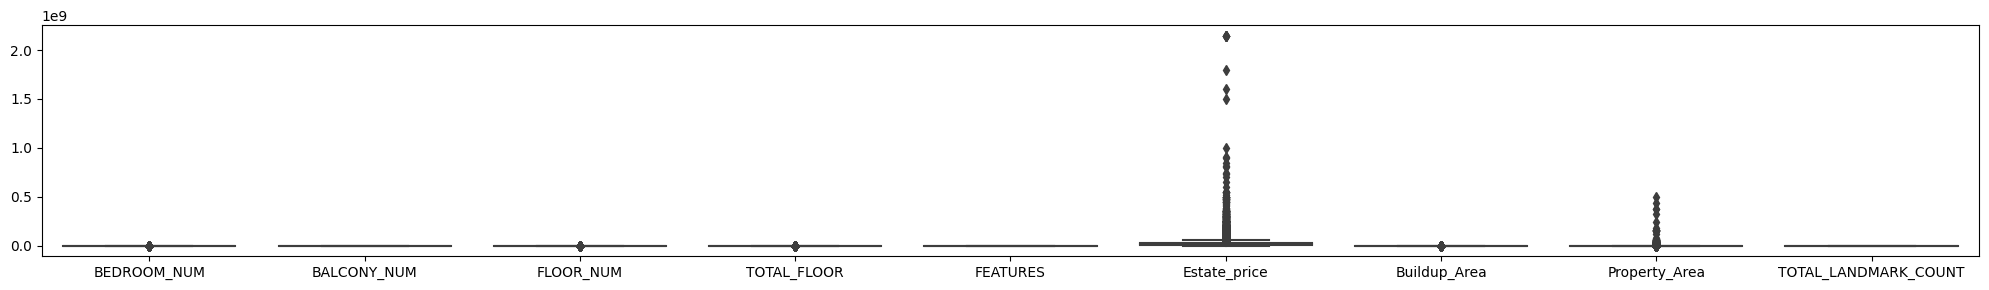

In [25]:
plt.figure(figsize=(25,3))
sns.boxplot(df)

In [26]:
df['TOTAL_FLOOR'] = df['TOTAL_FLOOR'].fillna(df['TOTAL_FLOOR'].median())
df['FLOOR_NUM'] = df['FLOOR_NUM'].fillna(df['FLOOR_NUM'].median())
df['AGE'] = df['AGE'].fillna(df['AGE'].mode()[0])
df['OWNTYPE'] = df['OWNTYPE'].astype(str)
df['FURNISH'] = df['FURNISH'].astype(str)
df['TOTAL_LANDMARK_COUNT'] = df['TOTAL_LANDMARK_COUNT'].fillna(df['TOTAL_LANDMARK_COUNT'].mean())

In [27]:
pd.DataFrame(df.isna().sum())

,0
PREFERENCE,0
DESCRIPTION,0
PROPERTY_TYPE,0
CITY,0
OWNTYPE,0
BEDROOM_NUM,0
BALCONY_NUM,0
FURNISH,0
FACING,0
AGE,0


In [28]:
for i in df.select_dtypes(include= np.number):
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    ul = q1 - 1.5*iqr
    ll = q3 + 1.5*iqr
    df[i].clip(ll,ul,inplace= True)

<Axes: >

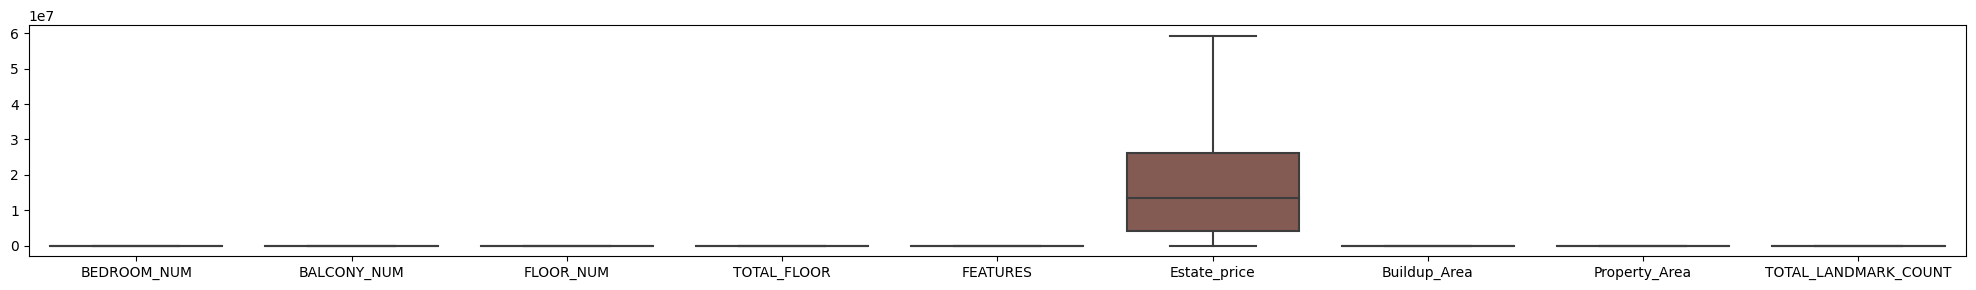

In [29]:
plt.figure(figsize=(25,3))
sns.boxplot(df)

In [30]:
nlp = df['DESCRIPTION']
df = df.drop(['DESCRIPTION','SECONDARY_TAGS'],axis=1)

In [31]:
df.head()

,PREFERENCE,PROPERTY_TYPE,CITY,OWNTYPE,BEDROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Estate_price,Buildup_Area,Property_Area,CLASS_LABEL,TOTAL_LANDMARK_COUNT
0,S,Residential Apartment,Gurgaon,FreeHold,4.0,4.0,Semifurnished,North,5-10 Year Old Property,14.0,26.0,18,26300000.0,319.028902,3434,Dealer,10.0
1,S,Residential Apartment,Gurgaon,FreeHold,4.0,3.0,Semifurnished,North,1-5 Year Old Property,7.0,29.0,22,36000000.0,266.631610,2870,Dealer,9.0
2,R,Residential Apartment,Gurgaon,FreeHold,3.0,2.0,Furnished,West,1-5 Year Old Property,7.0,17.0,29,85000.0,181.160850,1950,Dealer,14.0
3,S,Residential Apartment,Gurgaon,FreeHold,3.0,3.0,Semifurnished,East,1-5 Year Old Property,14.0,28.0,17,38500000.0,260.314206,2802,Dealer,8.0
4,R,Residential Apartment,Gurgaon,FreeHold,3.0,4.0,Semifurnished,North_west,1-5 Year Old Property,12.0,27.0,18,40000.0,212.747870,2290,Dealer,14.0


# Perform Encoder :

In [32]:
df = pd.get_dummies(df, prefix='', prefix_sep='')
df.tail()

,BEDROOM_NUM,BALCONY_NUM,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Estate_price,Buildup_Area,Property_Area,TOTAL_LANDMARK_COUNT,P,...,South_west,West,0-1 Year Old Property,1-5 Year Old Property,10+ Year Old Property,5-10 Year Old Property,Under Construction,Builder,Dealer,Owner
38497,1.0,0.0,1.0,33.0,1,5040000.0,39.019260,420,9.0,0,...,0,0,0,0,0,0,1,0,1,0
38498,3.0,0.0,1.0,41.0,1,13000000.0,98.848792,1064,8.0,0,...,0,0,0,0,0,0,1,0,1,0
38499,2.0,0.0,1.0,41.0,1,8000000.0,56.206315,605,8.0,0,...,0,0,0,0,0,0,1,0,1,0
38500,1.0,0.0,1.0,41.0,1,5500000.0,38.368939,413,8.0,0,...,0,0,0,0,0,0,1,0,1,0
38501,3.0,0.0,1.0,34.0,1,16000000.0,129.971297,1399,7.0,0,...,0,0,1,0,0,0,0,0,1,0


In [33]:
Final_df = df.copy()

# Model Buliding:

In [34]:
from sklearn.metrics import r2_score, mean_squared_error

# ANN

In [35]:
############ Data Visualization ############
import matplotlib.pyplot as plt 
import seaborn as sns

############ Data analysis & calculation ############
import numpy as np
import pandas as pd
np.set_printoptions(precision=3, suppress=True)

############ Model building & Pre-Processing ############
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [36]:
df

,BEDROOM_NUM,BALCONY_NUM,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Estate_price,Buildup_Area,Property_Area,TOTAL_LANDMARK_COUNT,P,...,South_west,West,0-1 Year Old Property,1-5 Year Old Property,10+ Year Old Property,5-10 Year Old Property,Under Construction,Builder,Dealer,Owner
0,4.0,4.0,14.0,26.0,18,26300000.0,319.028902,3434,10.0,0,...,0,0,0,0,0,1,0,0,1,0
1,4.0,3.0,7.0,29.0,22,36000000.0,266.631610,2870,9.0,0,...,0,0,0,1,0,0,0,0,1,0
2,3.0,2.0,7.0,17.0,29,85000.0,181.160850,1950,14.0,0,...,0,1,0,1,0,0,0,0,1,0
3,3.0,3.0,14.0,28.0,17,38500000.0,260.314206,2802,8.0,0,...,0,0,0,1,0,0,0,0,1,0
4,3.0,4.0,12.0,27.0,18,40000.0,212.747870,2290,14.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38497,1.0,0.0,1.0,33.0,1,5040000.0,39.019260,420,9.0,0,...,0,0,0,0,0,0,1,0,1,0
38498,3.0,0.0,1.0,41.0,1,13000000.0,98.848792,1064,8.0,0,...,0,0,0,0,0,0,1,0,1,0
38499,2.0,0.0,1.0,41.0,1,8000000.0,56.206315,605,8.0,0,...,0,0,0,0,0,0,1,0,1,0
38500,1.0,0.0,1.0,41.0,1,5500000.0,38.368939,413,8.0,0,...,0,0,0,0,0,0,1,0,1,0


#### Converting Data into Number :

In [37]:
df["Estate_price"] = np.sqrt(np.sqrt(df['Estate_price']))

### Data Split train & Test

In [38]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [39]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

In [40]:
train_features.head()

,BEDROOM_NUM,BALCONY_NUM,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Estate_price,Buildup_Area,Property_Area,TOTAL_LANDMARK_COUNT,P,...,South_west,West,0-1 Year Old Property,1-5 Year Old Property,10+ Year Old Property,5-10 Year Old Property,Under Construction,Builder,Dealer,Owner
11626,0.5,0.0,4.0,14.0,1,65.934915,185.620194,1998,47.000000,0,...,0,0,0,1,0,0,0,0,0,1
252,3.0,2.0,17.0,35.0,22,62.129315,129.042267,1389,7.000000,0,...,0,0,0,0,0,0,1,0,1,0
12710,4.0,3.0,4.0,3.0,27,87.752476,383.921647,5015,16.000000,0,...,0,1,1,0,0,0,0,0,1,0
13283,0.5,0.0,4.0,5.0,4,40.430504,139.633209,1503,24.285277,0,...,0,0,0,1,0,0,0,0,1,0
9607,3.0,4.0,8.0,14.0,21,55.575975,141.862881,1527,9.000000,0,...,0,0,0,0,0,0,1,0,1,0


In [41]:
train_labels = train_features.pop('Estate_price')  # Dependent Variable ( Y)  
test_labels = test_features.pop('Estate_price')

In [42]:
normalizer = preprocessing.Normalization() 

In [43]:
normalizer.adapt(np.array(train_features))  ### convert to array then normalizing

In [44]:
first = np.array(train_features[:1])

with np.printoptions(precision=2): # 2 decimal upto 
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example: [[   0.5     0.      4.     14.      1.    185.62 1998.     47.      0.
     0.      1.      0.      0.      0.      0.      0.      1.      0.
     0.      0.      0.      1.      0.      0.      0.      0.      0.
     0.      0.      0.      0.      0.      1.      0.      0.      1.
     0.      0.      0.      0.      0.      0.      1.      0.      0.
     0.      0.      1.      0.      0.      0.      0.      0.      1.  ]]

Normalized: [[-1.8  -1.11 -0.31 -0.16 -1.03  0.26 -0.12  1.31 -0.23 -0.35  0.44 -0.04
  -0.3  -0.33 -0.01 -1.55  2.95 -0.05 -0.08 -0.25 -0.75  1.54 -0.11 -0.23
  -0.14 -0.12 -0.11 -0.28 -0.16 -0.17 -0.23 -0.18  0.2  -0.08 -0.05  1.23
  -0.8  -0.52 -1.15 -0.29 -0.47 -0.14  7.54 -0.14 -0.11 -0.33 -0.51  1.33
  -0.27 -0.34 -0.59 -0.15 -3.28  3.83]]


In [45]:
from keras.models import Sequential
from keras.layers import Dense , Dropout

In [46]:
def build_and_compile_model(norm):
    model = keras.Sequential([norm,
                              layers.Dense(640, activation='relu'),
                              layers.Dense(129, activation='relu'),
                              layers.Dense(458,activation= 'relu'),
                              layers.Dense(458,activation= 'relu'),
#                               layers.Dropout(0.5),
                              layers.Dense(128,activation= 'relu'),
                              layers.Dense(128,activation= 'relu'),
                              layers.Dense(128,activation= 'relu'),
                              layers.Dense(128,activation= 'relu'),
#                               layers.Dropout(0.5),
                              layers.Dense(128,activation= 'relu'),
                              layers.Dense(128,activation= 'relu'),
                              layers.Dense(128,activation= 'relu'),
                              layers.Dense(128,activation= 'relu'),
#                               layers.Dropout(0.5),
                              layers.Dense(128,activation= 'relu'),
                              layers.Dense(128,activation= 'relu'),
                              layers.Dense(1, activation='linear')])

    model.compile(loss='mean_absolute_error',   # MAE 
                optimizer=tf.keras.optimizers.SGD(0.01)) # instead of Adam use SGB
    return model

# activation function = 'relu' or 'linear'

In [47]:
dnn_model = build_and_compile_model(normalizer)

dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 54)                109       
 on)                                                             
                                                                 
 dense (Dense)               (None, 640)               35200     
                                                                 
 dense_1 (Dense)             (None, 129)               82689     
                                                                 
 dense_2 (Dense)             (None, 458)               59540     
                                                                 
 dense_3 (Dense)             (None, 458)               210222    
                                                                 
 dense_4 (Dense)             (None, 128)               58752     
                                                        

In [48]:
%%time
history = dnn_model.fit(train_features, train_labels,
    validation_split=0.2,
    verbose=2, epochs=10)

Epoch 1/10

595/595 - 5s - loss: 18.7577 - val_loss: 6.8543 - 5s/epoch - 9ms/step
Epoch 2/10
595/595 - 4s - loss: 6.9758 - val_loss: 5.0396 - 4s/epoch - 6ms/step
Epoch 3/10
595/595 - 3s - loss: 5.9425 - val_loss: 11.6236 - 3s/epoch - 6ms/step
Epoch 4/10
595/595 - 4s - loss: 5.4172 - val_loss: 7.9452 - 4s/epoch - 6ms/step
Epoch 5/10
595/595 - 3s - loss: 5.1481 - val_loss: 6.0523 - 3s/epoch - 6ms/step
Epoch 6/10
595/595 - 3s - loss: 4.8870 - val_loss: 7.7727 - 3s/epoch - 6ms/step
Epoch 7/10
595/595 - 4s - loss: 4.7868 - val_loss: 6.8946 - 4s/epoch - 6ms/step
Epoch 8/10
595/595 - 4s - loss: 4.7120 - val_loss: 4.9625 - 4s/epoch - 6ms/step
Epoch 9/10
595/595 - 3s - loss: 4.6274 - val_loss: 5.7515 - 3s/epoch - 6ms/step
Epoch 10/10
595/595 - 3s - loss: 4.5802 - val_loss: 5.1272 - 3s/epoch - 6ms/step
CPU times: total: 12.9 s
Wall time: 36.9 s


In [49]:
train_results = {}
train_results['Linear model With Hidden Layer'] = dnn_model.evaluate(train_features, train_labels, verbose=0)
train_results

{'Linear model With Hidden Layer': 4.928825855255127}

In [50]:
test_results = {}
test_results['Linear model With Hidden Layer'] = dnn_model.evaluate(test_features, test_labels, verbose=0)
test_results

{'Linear model With Hidden Layer': 5.192135334014893}

In [51]:
train_full = pd.concat([train_features,train_labels],axis=1)
train_full.head()

,BEDROOM_NUM,BALCONY_NUM,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Buildup_Area,Property_Area,TOTAL_LANDMARK_COUNT,P,R,...,West,0-1 Year Old Property,1-5 Year Old Property,10+ Year Old Property,5-10 Year Old Property,Under Construction,Builder,Dealer,Owner,Estate_price
11626,0.5,0.0,4.0,14.0,1,185.620194,1998,47.000000,0,0,...,0,0,1,0,0,0,0,0,1,65.934915
252,3.0,2.0,17.0,35.0,22,129.042267,1389,7.000000,0,0,...,0,0,0,0,0,1,0,1,0,62.129315
12710,4.0,3.0,4.0,3.0,27,383.921647,5015,16.000000,0,0,...,1,1,0,0,0,0,0,1,0,87.752476
13283,0.5,0.0,4.0,5.0,4,139.633209,1503,24.285277,0,0,...,0,0,1,0,0,0,0,1,0,40.430504
9607,3.0,4.0,8.0,14.0,21,141.862881,1527,9.000000,0,0,...,0,0,0,0,0,1,0,1,0,55.575975


In [52]:
train_full["Prediction"]=np.round(dnn_model.predict(train_features))
train_full.head()

743/743 [==============================] - 3s 3ms/step


,BEDROOM_NUM,BALCONY_NUM,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Buildup_Area,Property_Area,TOTAL_LANDMARK_COUNT,P,R,...,0-1 Year Old Property,1-5 Year Old Property,10+ Year Old Property,5-10 Year Old Property,Under Construction,Builder,Dealer,Owner,Estate_price,Prediction
11626,0.5,0.0,4.0,14.0,1,185.620194,1998,47.000000,0,0,...,0,1,0,0,0,0,0,1,65.934915,63.0
252,3.0,2.0,17.0,35.0,22,129.042267,1389,7.000000,0,0,...,0,0,0,0,1,0,1,0,62.129315,65.0
12710,4.0,3.0,4.0,3.0,27,383.921647,5015,16.000000,0,0,...,1,0,0,0,0,0,1,0,87.752476,90.0
13283,0.5,0.0,4.0,5.0,4,139.633209,1503,24.285277,0,0,...,0,1,0,0,0,0,1,0,40.430504,42.0
9607,3.0,4.0,8.0,14.0,21,141.862881,1527,9.000000,0,0,...,0,0,0,0,1,0,1,0,55.575975,62.0


In [53]:
test_full = pd.concat([test_features,test_labels],axis=1)
test_full.head()

,BEDROOM_NUM,BALCONY_NUM,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Buildup_Area,Property_Area,TOTAL_LANDMARK_COUNT,P,R,...,West,0-1 Year Old Property,1-5 Year Old Property,10+ Year Old Property,5-10 Year Old Property,Under Construction,Builder,Dealer,Owner,Estate_price
10,0.5,0.0,4.0,2.0,1,217.393020,2340,10.0,0,0,...,1,0,1,0,0,0,0,1,0,80.310685
13,3.0,2.0,0.0,17.0,27,181.160850,1950,14.0,0,1,...,1,0,1,0,0,0,0,1,0,16.265766
19,3.0,3.0,2.0,14.0,15,185.806000,2000,10.0,0,0,...,0,0,1,0,0,0,0,1,0,66.021958
28,4.0,4.0,6.0,14.0,24,249.909070,2690,14.0,0,1,...,0,0,1,0,0,0,0,1,0,17.074765
40,4.0,2.0,1.0,4.0,10,219.901401,2367,45.0,0,0,...,0,1,0,0,0,0,0,1,0,69.992710


In [54]:
test_full["Prediction"] = np.round(dnn_model.predict(test_features))
test_full.head()

186/186 [==============================] - 1s 4ms/step


,BEDROOM_NUM,BALCONY_NUM,FLOOR_NUM,TOTAL_FLOOR,FEATURES,Buildup_Area,Property_Area,TOTAL_LANDMARK_COUNT,P,R,...,0-1 Year Old Property,1-5 Year Old Property,10+ Year Old Property,5-10 Year Old Property,Under Construction,Builder,Dealer,Owner,Estate_price,Prediction
10,0.5,0.0,4.0,2.0,1,217.393020,2340,10.0,0,0,...,0,1,0,0,0,0,1,0,80.310685,78.0
13,3.0,2.0,0.0,17.0,27,181.160850,1950,14.0,0,1,...,0,1,0,0,0,0,1,0,16.265766,15.0
19,3.0,3.0,2.0,14.0,15,185.806000,2000,10.0,0,0,...,0,1,0,0,0,0,1,0,66.021958,66.0
28,4.0,4.0,6.0,14.0,24,249.909070,2690,14.0,0,1,...,0,1,0,0,0,0,1,0,17.074765,16.0
40,4.0,2.0,1.0,4.0,10,219.901401,2367,45.0,0,0,...,1,0,0,0,0,0,1,0,69.992710,78.0


In [55]:
Train_r2 = round(r2_score(train_full['Estate_price'],train_full['Prediction'])*100,2)
Train_r2

83.84

In [56]:
Test_r2 = round(r2_score(test_full['Estate_price'],test_full['Prediction'])*100,2)
Test_r2

82.44